In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("../input/usa-monthly-retail-trade/mrtssales92-present.xls",sheet_name = None, header = 0, encoding = 'utf-8',errors='strict')

## Data Cleaning

removing Unnamed columns created due to encoding error by pandas in the dataframe

In [3]:
for key in df:
    df[key] = df[key].loc[:, ~df[key].columns.str.contains('^Unnamed')]

### Extract main categories

Slicing Database into two dataframes of Not Adjusted and Adjusted Main Categories (NAICS code : 4xx, 7xx)

In [4]:
df_cat_ad = {}
df_cat_nad = {}
for key in df:
    df_cat = df.copy()
    df_cat[key]['NAICS  Code'] = df_cat[key]['NAICS  Code'].astype('str')
    df_cat[key]['NAICS Code Cat'] = df_cat[key]['NAICS  Code'].str.extract('^(\d{3})$')
    index = pd.Index(df_cat[key]['Kind of Business'])
    x = index.get_loc('ADJUSTED(2)')
    df_cat_ad[key] = df_cat[key].iloc[x:]
    df_cat_ad[key] = df_cat_ad[key].dropna(subset = ['NAICS Code Cat'])
    df_cat_ad[key] = df_cat_ad[key].reset_index(drop = True)
    df_cat_ad[key] = df_cat_ad[key].drop(['NAICS Code Cat'], axis=1)
    df_cat_nad[key] = df_cat[key].iloc[0:x]
    df_cat_nad[key] = df_cat_nad[key].dropna(subset = ['NAICS Code Cat'])
    df_cat_nad[key] = df_cat_nad[key].reset_index(drop = True)
    df_cat_nad[key] = df_cat_nad[key].drop(['NAICS Code Cat'], axis=1)

checking weather data contains (NA):Not Available or (S):Suppressed values

In [5]:
def string_finder(row, words):
    if any(word in field for field in row for word in words):
        return 1
    return 0

In [6]:
match = ['(NA)', '(S)']
for key in df:
    df_cat_nad[key]['isContained'] = df_cat_nad[key].astype(str).apply(string_finder, words=match, axis=1)
    df_cat_ad[key]['isContained'] = df_cat_ad[key].astype(str).apply(string_finder, words=match, axis=1)
    print(key)
    print('Not Adjusted data contains', df_cat_nad[key]['isContained'].sum(), '(NA):Not Available or (S):Suppressed values')
    print('Adjusted data contains', df_cat_ad[key]['isContained'].sum(), '(NA):Not Available or (S):Suppressed values')
#     df_cat_nad[key] = df_cat_nad[key].drop(['isContained'], axis=1)
#     df_cat_ad[key] = df_cat_ad[key].drop(['isContained'], axis=1)

2020
Not Adjusted data contains 0 (NA):Not Available or (S):Suppressed values
Adjusted data contains 0 (NA):Not Available or (S):Suppressed values
2019
Not Adjusted data contains 0 (NA):Not Available or (S):Suppressed values
Adjusted data contains 0 (NA):Not Available or (S):Suppressed values
2018
Not Adjusted data contains 0 (NA):Not Available or (S):Suppressed values
Adjusted data contains 0 (NA):Not Available or (S):Suppressed values
2017
Not Adjusted data contains 0 (NA):Not Available or (S):Suppressed values
Adjusted data contains 0 (NA):Not Available or (S):Suppressed values
2016
Not Adjusted data contains 0 (NA):Not Available or (S):Suppressed values
Adjusted data contains 0 (NA):Not Available or (S):Suppressed values
2015
Not Adjusted data contains 0 (NA):Not Available or (S):Suppressed values
Adjusted data contains 0 (NA):Not Available or (S):Suppressed values
2014
Not Adjusted data contains 0 (NA):Not Available or (S):Suppressed values
Adjusted data contains 0 (NA):Not Availa

Since data contains many different kinds of dtypes, cleaning data of different dtypes

In [7]:
for key in df:
    df_cat_nad[key].iloc[ : ,2: ] = df_cat_nad[key].iloc[ : ,2: ].astype(float)
    df_cat_ad[key].iloc[ : ,2: ] = df_cat_ad[key].iloc[ : ,2: ].astype(float)

In [8]:
for key in df:
    df_cat_nad[key] = df_cat_nad[key].drop(['isContained'], axis=1)
    df_cat_ad[key] = df_cat_ad[key].drop(['isContained'], axis=1)

Since our data is Categorical data we need to modify it
* seperating Total from data 
* Encoding rows into columns
* converting Rows to column and making a single dataframe for all years

In [9]:
for key in df:
    df_cat_nad[key]['Kind of Business'] = df_cat_nad[key]['NAICS  Code'] + ': ' + df_cat_nad[key]['Kind of Business']
    df_cat_ad[key]['Kind of Business'] = df_cat_ad[key]['NAICS  Code'] + ': ' + df_cat_ad[key]['Kind of Business']

In [10]:
df_cat_nad_m = {}
df_cat_ad_m = {}
for key in df:
    df_cat_nad_m[key] = df_cat_nad[key].iloc[ : ,1:-1]
    df_cat_nad_m[key] = df_cat_nad_m[key].transpose(copy = True)
    header = df_cat_nad_m[key].iloc[0]
    df_cat_nad_m[key] = df_cat_nad_m[key][1:]
    df_cat_nad_m[key] = df_cat_nad_m[key].rename(columns = header)
    df_cat_nad_m[key] = df_cat_nad_m[key].astype(float)
    df_cat_nad_m[key] = df_cat_nad_m[key].reset_index().rename(columns={'index': 'Months'})
    df_cat_ad_m[key] = df_cat_ad[key].iloc[ : ,1:-1]
    df_cat_ad_m[key] = df_cat_ad_m[key].transpose(copy = True)
    header = df_cat_ad_m[key].iloc[0]
    df_cat_ad_m[key] = df_cat_ad_m[key][1:]
    df_cat_ad_m[key] = df_cat_ad_m[key].rename(columns = header)
    df_cat_ad_m[key] = df_cat_ad_m[key].astype(float)
    df_cat_ad_m[key] = df_cat_ad_m[key].reset_index().rename(columns={'index': 'Months'})

In [11]:
df_NA_months = pd.concat(df_cat_nad_m,ignore_index=True)
df_A_months = pd.concat(df_cat_ad_m,ignore_index=True)

### Time Series Indexing
Converting Months to Datetime64[ns] for time series analysis

In [12]:
df_A_months

,Months,441: Motor vehicle and parts dealers,442: Furniture and home furnishings stores,443: Electronics and appliance stores,444: Building mat. and garden equip. and supplies dealers,445: Food and beverage stores,446: Health and personal care stores,447: Gasoline stations,448: Clothing and clothing access. stores,"451: Sporting goods, hobby, musical instrument, and book stores",452: General merchandise stores,453: Miscellaneous stores retailers,454: Nonstore retailers,722: Food services and drinking places
0,Jan. 2020,105634.0,10139.0,8160.0,33922.0,64384.0,30017.0,42557.0,22503.0,6698.0,59963.0,11984.0,68101.0,65554.0
1,Feb. 2020,105229.0,10133.0,8056.0,33314.0,64329.0,30006.0,41302.0,22135.0,6714.0,59895.0,11877.0,68924.0,65359.0
2,Mar. 2020,77997.0,7897.0,6641.0,33544.0,81607.0,31552.0,34483.0,11362.0,5557.0,64986.0,10230.0,72365.0,45728.0
3,Jan. 2019,99055.0,9535.0,8147.0,33530.0,63462.0,29699.0,38831.0,22068.0,6514.0,59079.0,10616.0,62884.0,61616.0
4,Feb. 2019,99357.0,9651.0,8032.0,31585.0,62025.0,29887.0,40646.0,21970.0,6576.0,58594.0,10650.0,63494.0,62219.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,Aug. 1992,34585.0,4372.0,4048.0,10915.0,31041.0,7508.0,13092.0,10141.0,3512.0,20593.0,4494.0,6766.0,16733.0
335,Sep. 1992,35890.0,4345.0,4098.0,10980.0,30942.0,7420.0,13246.0,10154.0,3566.0,20684.0,4549.0,6714.0,16812.0
336,Oct. 1992,35972.0,4299.0,4186.0,10971.0,31148.0,7535.0,13304.0,10174.0,3607.0,20851.0,4809.0,6665.0,17104.0
337,Nov. 1992,35928.0,4368.0,4118.0,10873.0,30992.0,7497.0,13358.0,10076.0,3626.0,21078.0,5059.0,6610.0,17420.0


In [13]:
df_NA_months['Months'] = pd.to_datetime(df_NA_months['Months'], infer_datetime_format=True)
df_A_months['Months'] = pd.to_datetime(df_A_months['Months'], infer_datetime_format=True)

In [14]:
df_NA_months = df_NA_months.set_index('Months')
df_A_months = df_A_months.set_index('Months')

## Forcasting using Facebook Prophet

In [15]:
from fbprophet import Prophet

In [16]:
df_A_months

,441: Motor vehicle and parts dealers,442: Furniture and home furnishings stores,443: Electronics and appliance stores,444: Building mat. and garden equip. and supplies dealers,445: Food and beverage stores,446: Health and personal care stores,447: Gasoline stations,448: Clothing and clothing access. stores,"451: Sporting goods, hobby, musical instrument, and book stores",452: General merchandise stores,453: Miscellaneous stores retailers,454: Nonstore retailers,722: Food services and drinking places
Months,,,,,,,,,,,,,
2020-01-01,105634.0,10139.0,8160.0,33922.0,64384.0,30017.0,42557.0,22503.0,6698.0,59963.0,11984.0,68101.0,65554.0
2020-02-01,105229.0,10133.0,8056.0,33314.0,64329.0,30006.0,41302.0,22135.0,6714.0,59895.0,11877.0,68924.0,65359.0
2020-03-01,77997.0,7897.0,6641.0,33544.0,81607.0,31552.0,34483.0,11362.0,5557.0,64986.0,10230.0,72365.0,45728.0
2019-01-01,99055.0,9535.0,8147.0,33530.0,63462.0,29699.0,38831.0,22068.0,6514.0,59079.0,10616.0,62884.0,61616.0
2019-02-01,99357.0,9651.0,8032.0,31585.0,62025.0,29887.0,40646.0,21970.0,6576.0,58594.0,10650.0,63494.0,62219.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1992-08-01,34585.0,4372.0,4048.0,10915.0,31041.0,7508.0,13092.0,10141.0,3512.0,20593.0,4494.0,6766.0,16733.0
1992-09-01,35890.0,4345.0,4098.0,10980.0,30942.0,7420.0,13246.0,10154.0,3566.0,20684.0,4549.0,6714.0,16812.0
1992-10-01,35972.0,4299.0,4186.0,10971.0,31148.0,7535.0,13304.0,10174.0,3607.0,20851.0,4809.0,6665.0,17104.0


In [17]:
def change_name(timeseries):
    ts = {}
    ts['ds'] = timeseries.index
    ts['y'] = timeseries.values
    ts_df = pd.DataFrame(data = ts)
    return ts_df

/opt/conda/lib/python3.7/site-packages/fbprophet/plot.py:66: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(facecolor='w', figsize=figsize)
/opt/conda/lib/python3.7/site-packages/fbprophet/plot.py:146: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(npanel, 1, facecolor='w', figsize=figsize)
/opt/conda/lib/python3.7/site-packages/fbprophet/plot.py:66: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitl

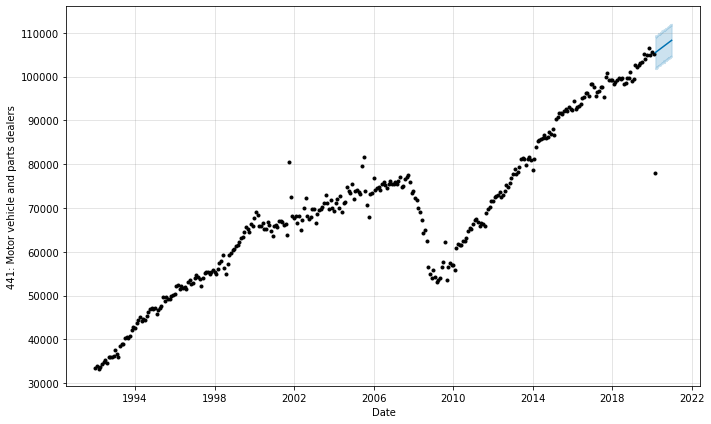

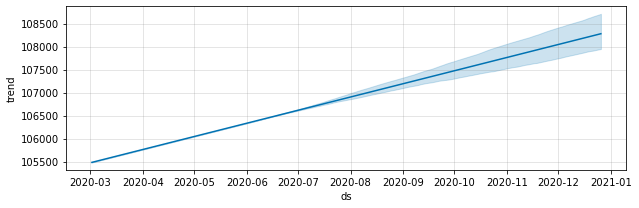

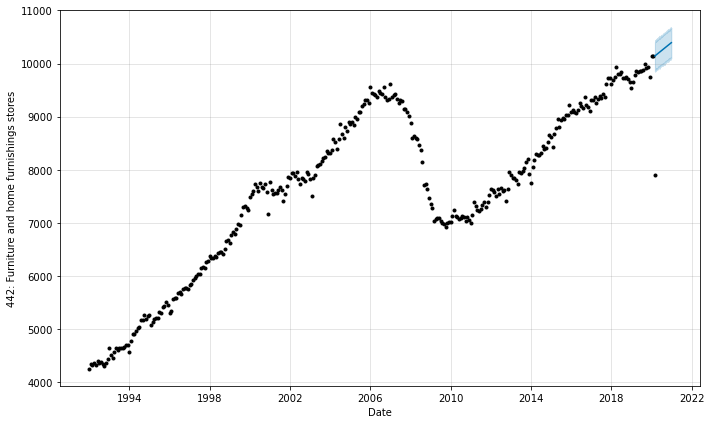

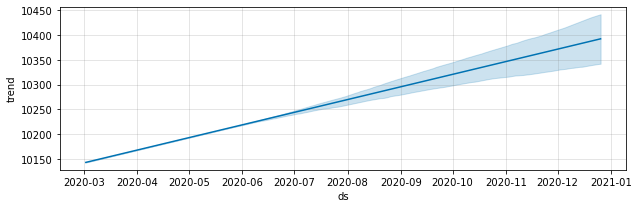

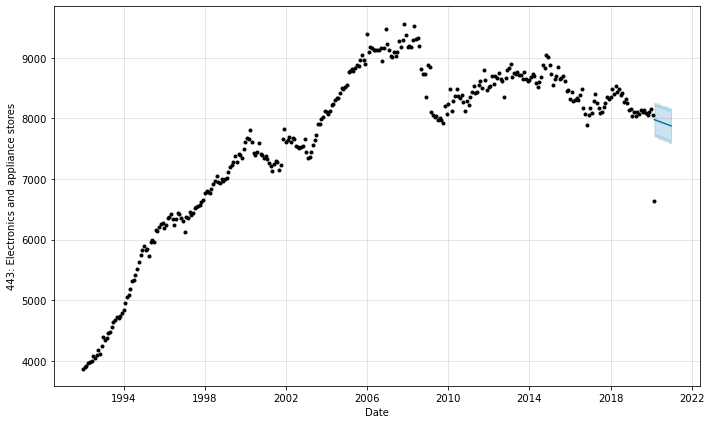

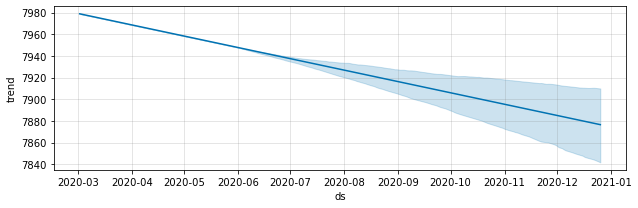

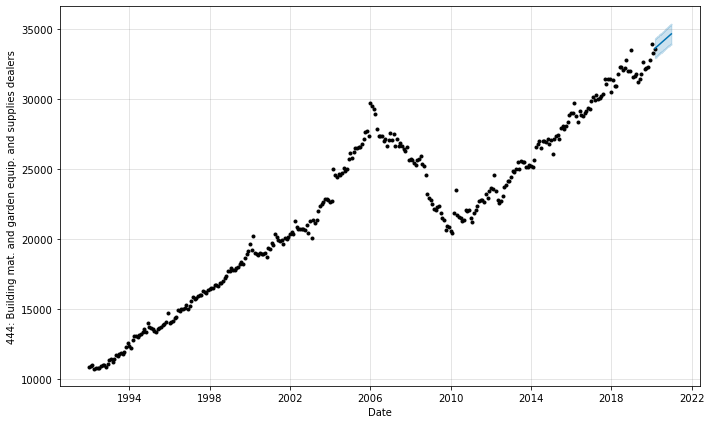

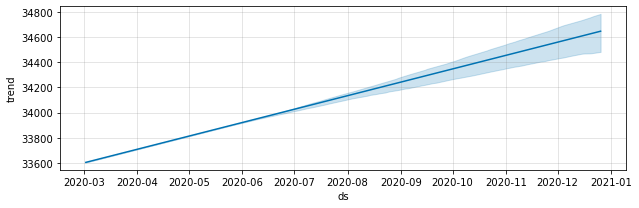

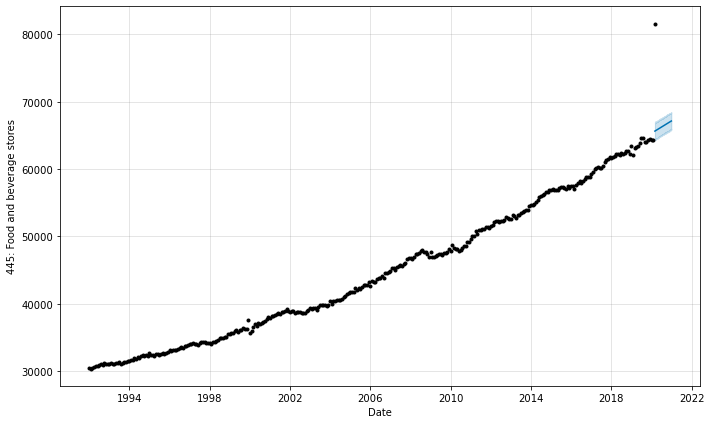

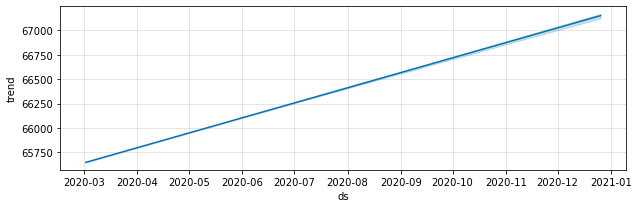

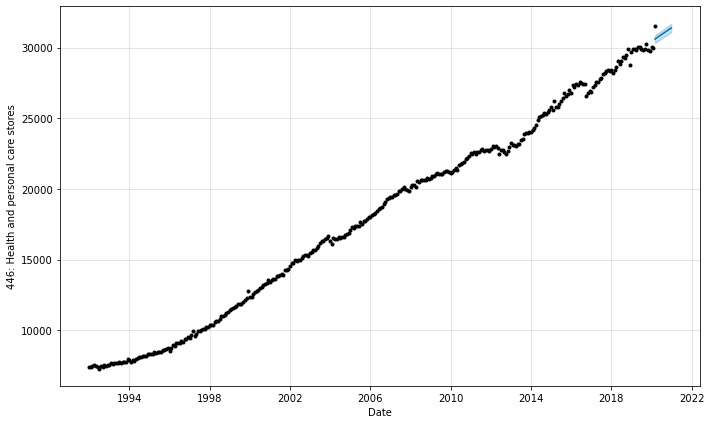

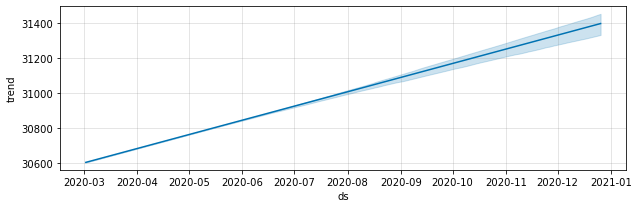

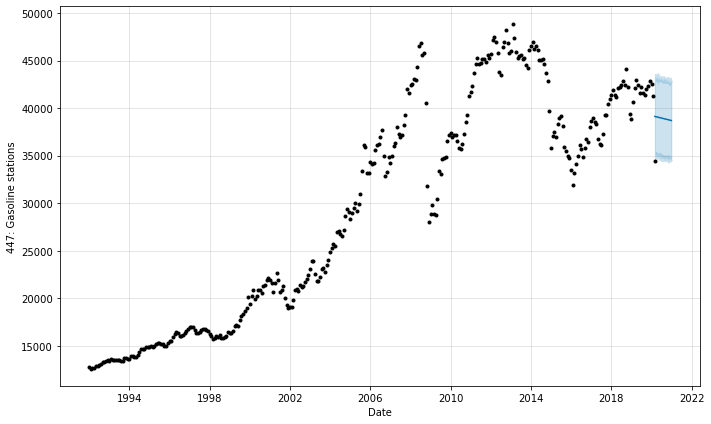

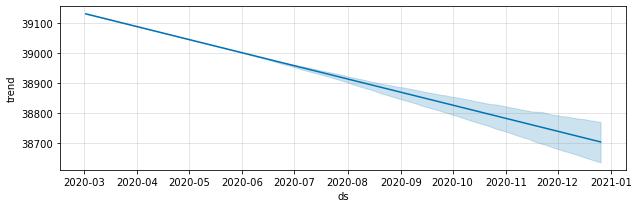

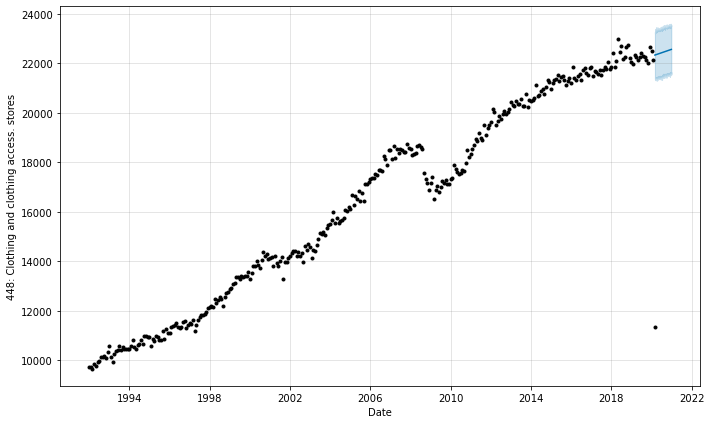

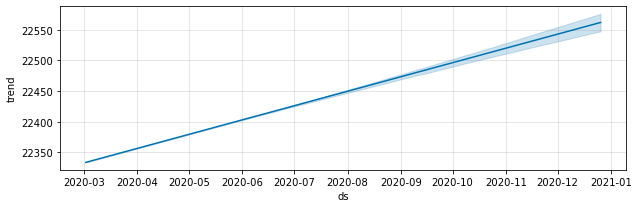

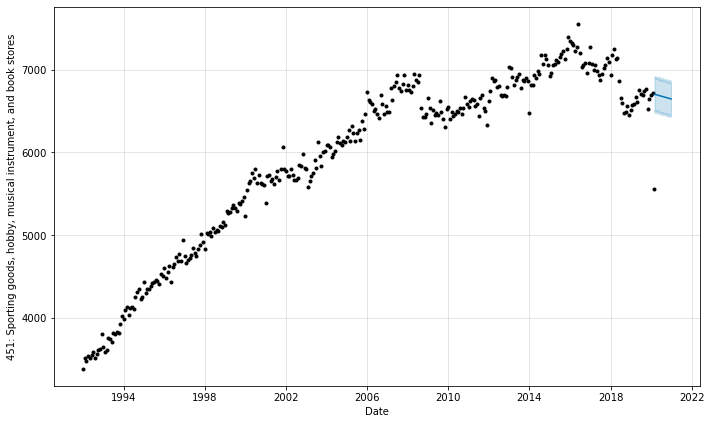

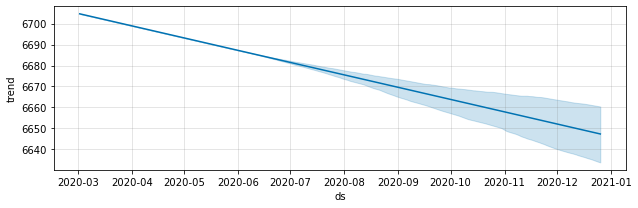

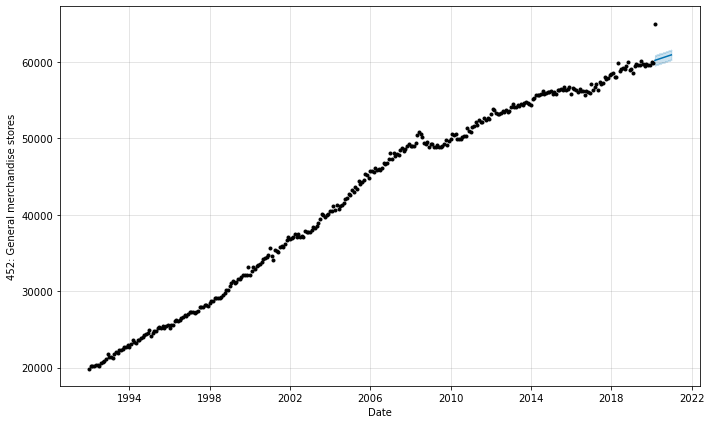

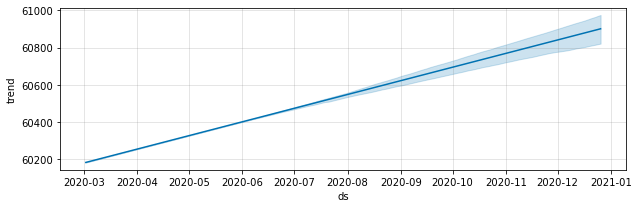

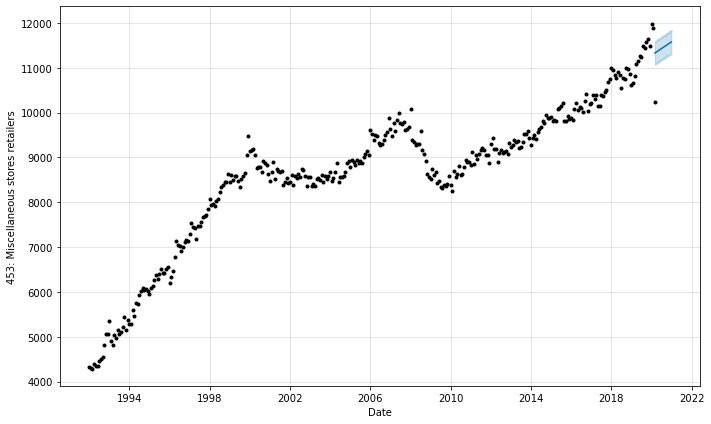

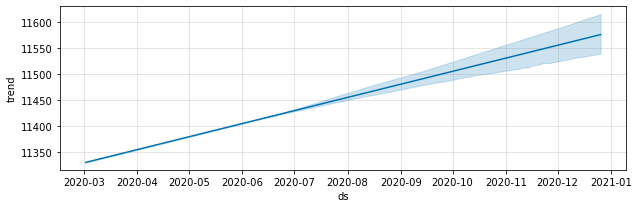

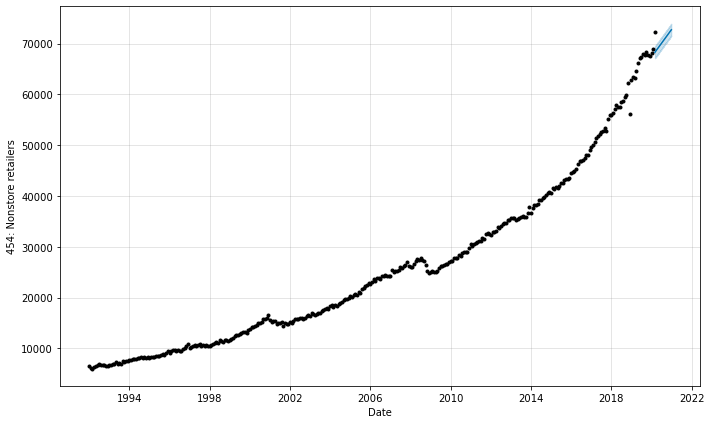

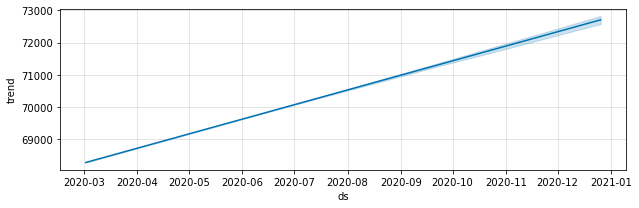

In [18]:
for i in range(0,12):
    ts = change_name(df_A_months.iloc[:,i])
    model = Prophet(yearly_seasonality=False,daily_seasonality=False)
    model.fit(ts)
    forecast = model.make_future_dataframe(periods=300, include_history=False)
    forecast = model.predict(forecast)
    figure = model.plot(forecast, xlabel = 'Date', ylabel = df_A_months.columns.values[i])
    figure2 = model.plot_components(forecast)